In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import os 
%matplotlib inline

# COPPER

In [2]:
#Type indicator name
indicator = 'copper'

#Put path to the folder with data source
os.chdir('F:/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data/azagorowski_data')

#Put source file name
source = indicator + '-prices-historical-chart-data.csv'

In [3]:
#Display options
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [8]:
#Import data, skip description rows, use columns: date & value
df = pd.read_csv(source, skiprows=14,
                     usecols=['date',' value'])

#Convert column type to date time
df["date"] = pd.to_datetime(df["date"])

#Select price between 2010-01-01 and 2020-03-24
filter = (df['date'] >= '2010-01-01') & (df['date'] < '2020-04-22')
df = df[filter]

#Rename columns
df = df.rename(columns={'date': 'Date', ' value': 'Price'})

#Reset the index order
df.index = df['Date']
df = df.drop(columns=['Date'])

#Display Data Frame
df.head()

Price
Date              
2010-01-04  3.4060
2010-01-06  3.4945
2010-01-07  3.4270
2010-01-08  3.4005
2010-01-11  3.4410

## Price chart

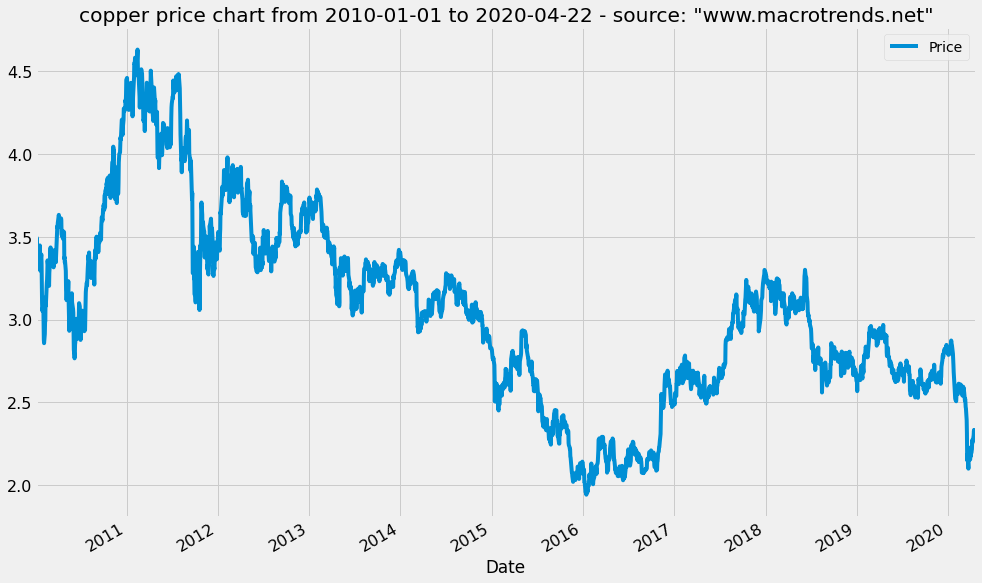

In [9]:
plt.style.use('fivethirtyeight')
df.plot(title=(indicator +" price chart from 2010-01-01 to 2020-04-22 - source: \"www.macrotrends.net\""),
            figsize=(15,10),grid=True,fontsize=16)

In [10]:
#Reset index and creating of new date column
df = df.reset_index()

#Rename columns for prophet library
df = df.rename(columns={'Date': 'ds', 'Price': 'y'})

#Display Data Frame
df.head()

ds       y
0 2010-01-04  3.4060
1 2010-01-06  3.4945
2 2010-01-07  3.4270
3 2010-01-08  3.4005
4 2010-01-11  3.4410

In [11]:
#Import Prophet library
from fbprophet import Prophet

#Instantiating a new Prophet object
m = Prophet(daily_seasonality=True)

#Call object's fit method and pass in the historical dataframe
m.fit(df)

In [12]:
#Extend the "ds" column with forecast
future = m.make_future_dataframe(freq='D',periods=365)
future.tail()

ds
2946 2021-04-17
2947 2021-04-18
2948 2021-04-19
2949 2021-04-20
2950 2021-04-21

In [13]:
#Assign predicted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2946 2021-04-17  2.296243    1.784067    2.841783
2947 2021-04-18  2.294453    1.790903    2.829827
2948 2021-04-19  2.255612    1.729133    2.790331
2949 2021-04-20  2.253915    1.747088    2.797503
2950 2021-04-21  2.249202    1.720932    2.806399

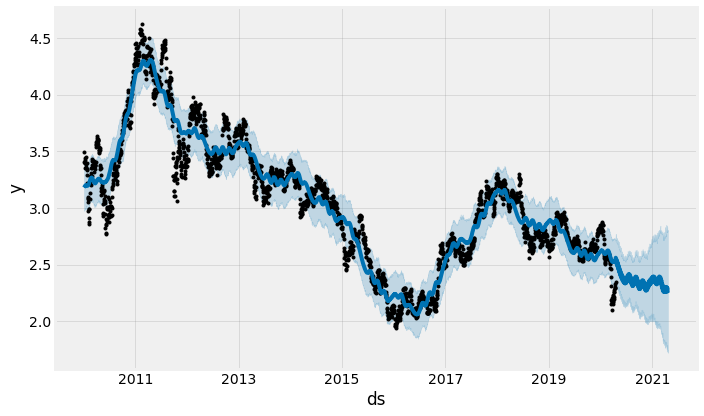

In [14]:
#Show a plot with the forecast
fig1 = m.plot(forecast)

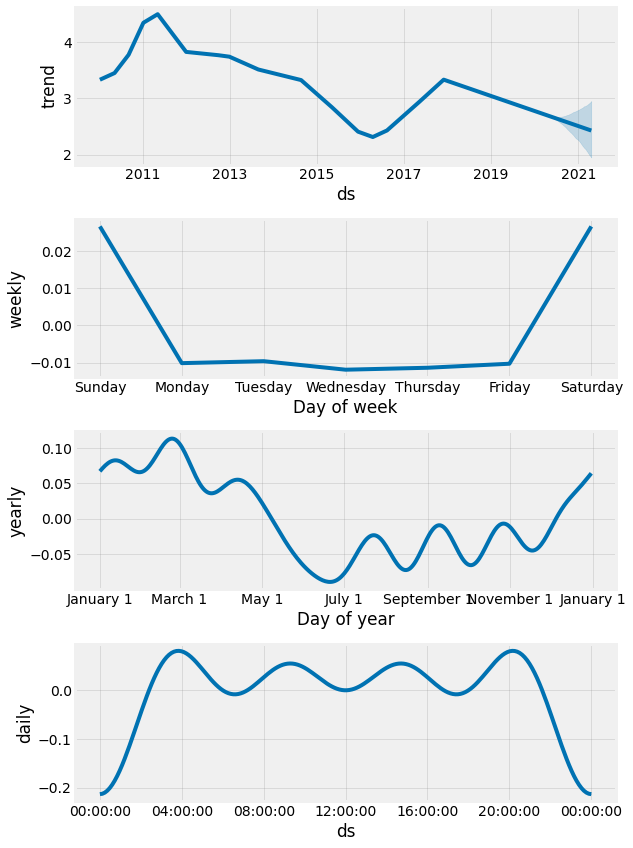

In [15]:
#Show a plot with components
fig2 = m.plot_components(forecast)

In [17]:
#Show interactive plot using plotly
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

#Add trendline to plot
fig = plot_plotly(m, forecast,trend=True)

#Update plot title, labels and other display options
fig.update_layout(
    title=(indicator +" price forecast 2021 using Prophet - source: \"www.macrotrends.net\""),
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#242151"
    )
)
py.iplot(fig)

# Conclusions

In [18]:
#Merge two Data Frames (imported from .csv file and forecast) on date column ('ds')
df2 = df.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],sort=True,on=['ds'],how="outer")

#Rename the columns title
df2 = df2.rename(columns={'ds': 'Date', 'y': 'Index','yhat': 'Forecast',
                          'yhat_lower': 'Forecast_(lower)','yhat_upper': 'Forecast_(upper)'})

#Display header
df2.tail(15)

Date  Index  Forecast  Forecast_(lower)  Forecast_(upper)
2936 2021-04-07    NaN  2.262981          1.787559          2.764152
2937 2021-04-08    NaN  2.263898          1.789607          2.770134
2938 2021-04-09    NaN  2.265209          1.799716          2.748142
2939 2021-04-10    NaN  2.302237          1.817021          2.813276
2940 2021-04-11    NaN  2.302070          1.811143          2.851717
2941 2021-04-12    NaN  2.264855          1.758348          2.786856
2942 2021-04-13    NaN  2.264764          1.752770          2.806274
2943 2021-04-14    NaN  2.261623          1.750406          2.807875
2944 2021-04-15    NaN  2.261057          1.737319          2.785783
2945 2021-04-16    NaN  2.260813          1.752598          2.807820
2946 2021-04-17    NaN  2.296243          1.784067          2.841783
2947 2021-04-18    NaN  2.294453          1.790903          2.829827
2948 2021-04-19    NaN  2.255612          1.729133          2.790331
2949 2021-04-20    NaN  2.253915          1.747088          2.797503
2950 2021-04-21    NaN  2.249202          1.720932          2.806399

In [19]:
#Calculation of mean for every column
meanIndex = df2['Index'].mean()
meanForecast = df2['Forecast'].mean()
meanForecastLower = df2['Forecast_(lower)'].mean()
meanForecastUpper = df2['Forecast_(upper)'].mean()

#Dictionary with mean values
meanDict = ({'Index': meanIndex, 'Forecast': meanForecast,
            'Forecast_(Lower)': meanForecastLower, 'Forecast_(Upper)': meanForecastUpper})
#Display mean
print('Mean: ')
meanDict

Mean: 


{'Index': 3.0483718048024757,
 'Forecast': 2.9608258058793835,
 'Forecast_(Lower)': 2.7492193861505867,
 'Forecast_(Upper)': 3.1732619758080913}

In [20]:
#Max values
maxIndex = df2['Index'].max()
maxForecast = df2['Forecast'].max()
maxForecastLower = df2['Forecast_(lower)'].max()
maxForecastUpper = df2['Forecast_(upper)'].max()

#Dictionary with max values
maxDict = ({'Index': maxIndex, 'Forecast': maxForecast,
            'Forecast_(Lower)': maxForecastLower, 'Forecast_(Upper)': maxForecastUpper})
#Display max
print('Max value: ')
maxDict

Max value: 


{'Index': 4.6285,
 'Forecast': 4.3052593442138045,
 'Forecast_(Lower)': 4.119052035066936,
 'Forecast_(Upper)': 4.513449446767803}

In [21]:
#Min values
minIndex = df2['Index'].min()
minForecast = df2['Forecast'].min()
minForecastLower = df2['Forecast_(lower)'].min()
minForecastUpper = df2['Forecast_(upper)'].min()

#Dictionary with min values
minDict = ({'Index': minIndex, 'Forecast': minForecast,
            'Forecast_(Lower)': minForecastLower, 'Forecast_(Upper)': minForecastUpper})
#Display mean
print('Min: ')
minDict

Min: 


{'Index': 1.9435,
 'Forecast': 2.0599858496583057,
 'Forecast_(Lower)': 1.7209320925463762,
 'Forecast_(Upper)': 2.2448660336260953}

In [22]:
#How many rows is above or below average predicted value
indexAboveMeanForecast = df2["Index"].between(meanForecast,maxIndex)
indexBelowMeanForecast = df2["Index"].between(minIndex,meanForecast)

In [23]:
#Smallest value date
minIndex = df2.nsmallest(n=1,columns='Index')
minIndexValue = minIndex['Index'].loc[minIndex.index]
minIndexDate = minIndex['Date'].loc[minIndex.index].to_string(index=False)

#Largest value date
maxIndex = df2.nlargest(n=1,columns='Index')
maxIndexValue = maxIndex['Index'].loc[maxIndex.index]
maxIndexDate = maxIndex['Date'].loc[maxIndex.index].to_string(index=False)

#Smallest predicted value date
minForecast = df2.nsmallest(n=1,columns='Forecast')
minForecastValue = minForecast['Forecast'].loc[minForecast.index]
minForecastDate = minForecast['Date'].loc[minForecast.index].to_string(index=False)

#Largest predicted value date
maxForecast = df2.nlargest(n=1,columns='Forecast')
maxForecastValue = maxForecast['Forecast'].loc[maxForecast.index]
maxForecastDate = maxForecast['Date'].loc[maxForecast.index].to_string(index=False)
maxForecastDate

'2011-04-19'

# SUMMARY

In [24]:
print('The average index value is %f and the average predicted value is %f .' % (meanIndex, meanForecast))
print('There are %d rows (values) above average predicted value.' % len(df2[indexAboveMeanForecast]))
print('There are %d rows (values) below average predicted value.' % len(df2[indexBelowMeanForecast]))
print('The smallest index value is %f on %s .' % (minIndexValue, minIndexDate))
print('The largest index value is %f on %s .' % (maxIndexValue, maxIndexDate))
print('The smallest predicted value is %f on %s .' % (minForecastValue, minForecastDate))
print('The largest predicted value is %f on %s .' % (maxForecastValue, maxForecastDate))

The average index value is 3.048372 and the average predicted value is 2.960826 .
There are 1403 rows (values) above average predicted value.
There are 1179 rows (values) below average predicted value.
The smallest index value is 1.943500 on 2016-01-15 .
The largest index value is 4.628500 on 2011-02-14 .
The smallest predicted value is 2.059986 on 2016-06-15 .
The largest predicted value is 4.305259 on 2011-04-19 .


# Saving DF with predictions to DB

In [25]:
#Destination folder
os.chdir('F:/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data')

import sqlite3

In [26]:
# Creating a database with predictions
conn = sqlite3.connect('predictionsAZ.db')
c = conn.cursor()

In [27]:
# Creating a table
c.execute('CREATE TABLE '+indicator+' ([Date] date PRIMARY KEY, [Index] float, [Forecast] float, [Forecast_(lower)] float, [Forecast_(upper)] float)')
conn.commit()

In [28]:
# Saving data frame to database 
df2.to_sql(indicator, conn, if_exists='replace', index = False)

In [29]:
# Extracing records from database (just for a test)

c.execute('''  
SELECT * FROM '''+indicator+'''
          ''')
for row in c.fetchall():
    print (row)

('2010-01-04 00:00:00', 3.406, 3.1798723189708085, 2.9798989953645263, 3.3810386523891314)
('2010-01-06 00:00:00', 3.4945, 3.183653838958577, 2.973392691742062, 3.3790713306717937)
('2010-01-07 00:00:00', 3.427, 3.1866787342716796, 2.981931812701112, 3.381170266787243)
('2010-01-08 00:00:00', 3.4005, 3.190054162409965, 2.987064390137387, 3.395186656731272)
('2010-01-11 00:00:00', 3.441, 3.1956602134013252, 2.9875047713323033, 3.3861510611629253)
('2010-01-12 00:00:00', 3.3495, 3.1974866268218967, 3.001754768065238, 3.405790490464949)
('2010-01-13 00:00:00', 3.4, 3.196235711468041, 2.9992104605481638, 3.400605153845248)
('2010-01-14 00:00:00', 3.3875, 3.1975389175283127, 2.986730191425004, 3.400610139336449)
('2010-01-15 00:00:00', 3.366, 3.1991543076094726, 2.998922339621707, 3.3804250318248314)
('2010-01-19 00:00:00', 3.447, 3.199863051069768, 3.0214743582020414, 3.3929682570098834)
('2010-01-20 00:00:00', 3.355, 3.197191446234996, 3.0094029368904778, 3.4064215359795424)
('2010-01-21 

('2020-10-13 00:00:00', None, 2.300822938776933, 2.054669946510429, 2.5642703080866402)
('2020-10-14 00:00:00', None, 2.301606980306737, 2.058204620109252, 2.5513352368254547)
('2020-10-15 00:00:00', None, 2.3052255359127085, 2.0397088155458194, 2.5662557727080806)
('2020-10-16 00:00:00', None, 2.309361174377838, 2.039914366356834, 2.5798257264354065)
('2020-10-17 00:00:00', None, 2.3492954675245947, 2.0956187396971067, 2.6247950729817857)
('2020-10-18 00:00:00', None, 2.3520695436351016, 2.1022618510595734, 2.600889975665084)
('2020-10-19 00:00:00', None, 2.3177859135238563, 2.0473103639415258, 2.5873065339675843)
('2020-10-20 00:00:00', None, 2.3205746091811847, 2.055998631477187, 2.5783846813759475)
('2020-10-21 00:00:00', None, 2.3202195826779, 2.04950986502312, 2.5918153941111726)
('2020-10-22 00:00:00', None, 2.3223071981502974, 2.05104676173129, 2.5757065265599075)
('2020-10-23 00:00:00', None, 2.324552294952541, 2.0809343237574693, 2.57293411100234)
('2020-10-24 00:00:00', None